In [1]:
# python 3
# -*- coding: utf-8 -*-
# load basics library
import pandas as pd
import numpy as np
import calendar
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tpot import TPOTRegressor
# DL
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers, callbacks, optimizers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
#import commond.ipynb from same folder
import import_ipynb
from common import *

Using TensorFlow backend.


importing Jupyter notebook from common.ipynb


In [2]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical


In [3]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, verbose_flag=1):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[0], trainX.shape[1], trainy.shape[0]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=verbose_flag)
    return accuracy


In [4]:
# fit and evaluate a model
def evaluate_model_small(trainX, trainy, testX, testy, verbose_flag, earlystop):
    verbose, epochs, batch_size = verbose_flag, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[0], trainX.shape[1], trainy.shape[0]
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_features, 1)))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.55))
    model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dropout(0.45))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[earlystop], shuffle=True)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=verbose)
    return accuracy, model

In [5]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))


In [6]:
# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataSet()
    print("trainX shape: ", trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX  shape: ", testX.shape)
    print("testy  shape: ", testy.shape)
    trainX, scaler_trainX = preprocess_data(trainX.values)
    trainy = trainy.values
    testX, scaler_testX = preprocess_data(testX.values)
    testy = testy.values
    
    trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
    #trainy = trainy.reshape(trainy.shape[0], 1)
    testX = testX.reshape((testX.shape[0], testX.shape[1], 1))
    #testy = testy.reshape(testy.shape[0], 1)
    
    print("trainX shape: ", trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX  shape: ", testX.shape)
    print("testy  shape: ", testy.shape)
    
    # simple early stopping
    es = EarlyStopping(monitor='loss', mode='min', verbose=1)
    # repeat experiment
    scores = list()
    models  = list()
    for r in range(repeats):
        score, model = evaluate_model_small(trainX, trainy, testX, testy, 1, es)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
        models.append(model)
    # summarize results
    summarize_results(scores)
    return scores, models

In [7]:
# run the experiment
scores, models = run_experiment(1)


   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2017-01-07 12:47:25   2017-01-07 13:07:19                  N   
1         2  2017-01-21 12:21:04   2017-01-21 12:22:57                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1            40           141              1.0           2.91   
1           1            74            74              1.0           0.36   

   fare_amount ...   ehail_fee  improvement_surcharge  total_amount  \
0         13.0 ...         NaN                    0.3         16.56   
1          3.5 ...         NaN                    0.3          4.30   

   payment_type  trip_type  duration  day_of_week  weekend      speed  tip  
0             1        1.0    1194.0            5        1   8.773869    1  
1             2        1.0     113.0            5        1  11.469027    0  

[2 rows x 24 columns]
trainX shape:  (2086637, 15)
trainy shape:  (2086637,)
testX  shape:

In [9]:
model = models.pop(0)

trainX, trainy, testX, testy = load_dataSet()
print("trainX shape: ", trainX.shape)
print("trainy shape: ", trainy.shape)
print("testX  shape: ", testX.shape)
print("testy  shape: ", testy.shape)
trainX, scaler_trainX = preprocess_data(trainX.values)
trainy = trainy.values
testX, scaler_testX = preprocess_data(testX.values)
testy = testy.values

trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)


   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2017-01-07 12:47:25   2017-01-07 13:07:19                  N   
1         2  2017-01-21 12:21:04   2017-01-21 12:22:57                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1            40           141              1.0           2.91   
1           1            74            74              1.0           0.36   

   fare_amount ...   ehail_fee  improvement_surcharge  total_amount  \
0         13.0 ...         NaN                    0.3         16.56   
1          3.5 ...         NaN                    0.3          4.30   

   payment_type  trip_type  duration  day_of_week  weekend      speed  tip  
0             1        1.0    1194.0            5        1   8.773869    1  
1             2        1.0     113.0            5        1  11.469027    0  

[2 rows x 24 columns]
trainX shape:  (2086637, 15)
trainy shape:  (2086637,)
testX  shape:

TypeError: must be real number, not list

Train: [0.9947428778673609, 0.6039421327237264]
Test: [1.212166221699563, 0.6044703233600577]


TypeError: 'History' object is not subscriptable

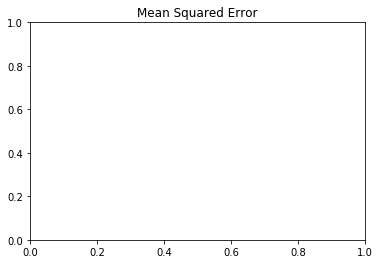

In [21]:
print('Train: %s'% str(train_mse))
print('Test: %s'% str(test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(model.history['loss'], label='train')
pyplot.plot(model.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
train_mse

AttributeError: 'list' object has no attribute 'shape'